##### ![UNIR](https://www.unir.net/wp-content/uploads/2014/10/logo.png)
### Máster en Inteligencia Artificial. 
**Asignatura:** _Aprendizaje Automático._

Luisa Sánchez Avivar

**Fecha:** _20 Febrero 2020_

---

# ACTIVIDAD 3: Técnicas de agrupamiento

Aplicar e interpretar los resultados de un algoritmo de Clustering aplicado sobre el conjunto de datos. Se recomienda la aplicación del algoritmo K-MEANS.
___

## Lectura de librerías

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

%matplotlib inline

## 1. Preprocesado de los datos
Vamos a analizar los datos del gasto anual de varios clientes, en productos de distintas categorías. Procedemos a eliminar todos los datos vacíos (NA), que en nuestro caso no hay. Además eliminaremos las columnas _Channel_ y _Region_ que no usaremos en nuestro algoritmo por ser irrelevantes para describir la variación en los distintos tipos de clientes.

In [80]:
df = pd.read_csv('data/Wholesale customers data.csv')
print(df.isnull().sum())
channel = df['Channel']
region = df['Region']
df = df.drop(labels=['Channel', 'Region'], axis=1)
samples, features = df.shape;
print ("\nEste dataset tiene",samples,"muestras con",features, "variables")


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Este dataset tiene 440 muestras con 6 variables


### 1.1 Exploración de los Datos

In [81]:
desc = df.describe()
desc

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


De la descripción estadística del dataset, vemos que está formado por 6 categorías (_Fresh, Milk, Grocery, Frozen, Detergents_Paper, y Delicassen_), considerando que cada categoría representa lo que el cliente podría comprar como producto.

## 2. Normalización de los Datos

### 2.1 Distribución de las variables
Para entender mejor el dataser podemos imprimir una matriz scatter  cada uno de los 6 productos presentes en los datos. Esta matriz mostrará una correlación entre aquellas variables que no sean relevantes para indentificar a un cliente específico.

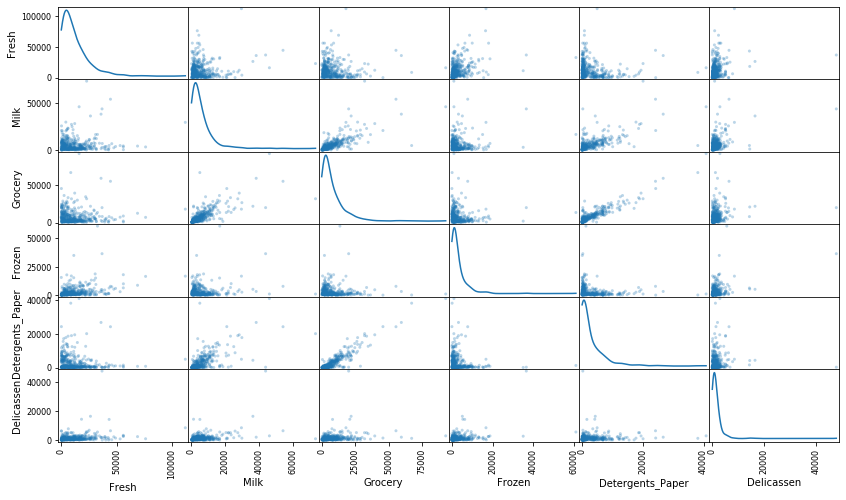

In [5]:
pd.plotting.scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

Los datos no están normalizados debido a la presencia de _outliers_. Los algoritmos de clustering exigen que los datos estén normalmente distribuidos.

In [82]:
# Normalizamos 
norm_scaler = preprocessing.Normalizer()
# Entrenamos el modelo
X = norm_scaler.fit_transform(df)
df_scaled = pd.DataFrame(X)
df_scaled = df_scaled.rename(columns = {0: 'Fresh', 1: 'Milk', 2:'Grocery', 3:'Frozen', 4:'Detergents_Paper', 5:'Delicatessen'})

display(df_scaled)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294
...,...,...,...,...,...,...
435,0.776890,0.315197,0.419191,0.343549,0.004760,0.057646
436,0.990872,0.036146,0.019298,0.113919,0.002349,0.059258
437,0.364462,0.388465,0.758545,0.010961,0.372237,0.046827
438,0.937737,0.180530,0.203404,0.094594,0.015310,0.193653


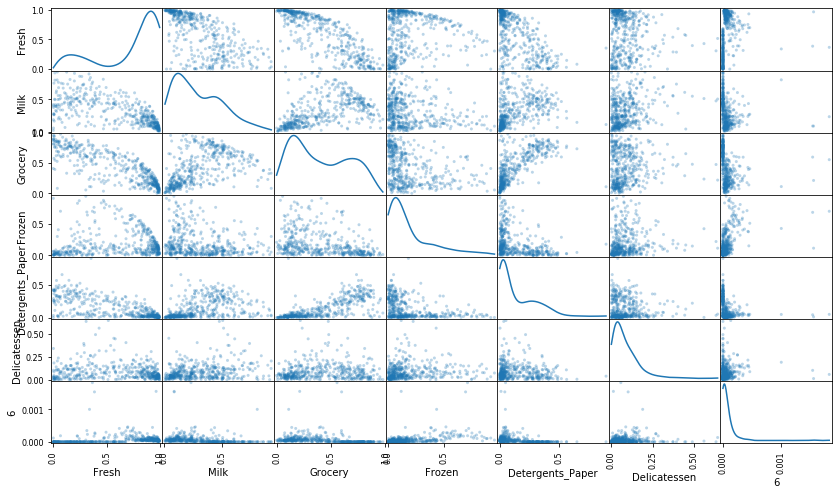

In [35]:
pd.plotting.scatter_matrix(df_scaled, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

Después de escalar los datos vemos que la distribución de los datos parece mucho más normal. Para cualquier par de productos que hayan presentado anteriormente una correlación, esta aún sigue -más débil o fuerte- presente 

## 3. Algoritmo K-Means
Usamos el algoritmo K-Means para identificar los segmentos de clientes que se encuentran en los datos

### 3.1 Determinar el número de clusters
En este bloque decidiremos qué valor de k (número de clusters) vamos a usar; Si conocemos bien la distribución de los datos, podemos simplemente escoger un valor para el número de clusters. En este caso usaremos la _gráfica elbow_ para determinar el número óptimo de este clusters.

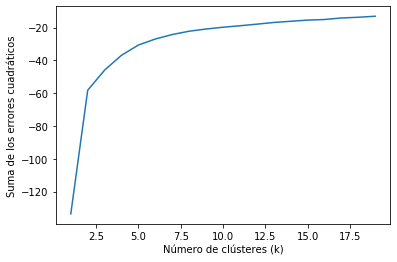

In [113]:
# El número de iteraciones que queremos hacer
num_clusters = range(1, 20)
k_means = [KMeans(n_clusters = i) for i in num_clusters]
score = [k_means[i].fit(df_scaled).score(df_scaled) for i in range(len(k_means))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(num_clusters, score)


La curva nos muestra que un rango apropiado podría ser k = [2.5, 5.5], por lo que podemos probar valores entre 2.5 y 5.5 y comparar resultados. Ya que el objetivo de una clusterización con K-Means es obtener información útil de nuestros datos,no hay un único valor correcto pero si es cierto que la intepretación posterior de los clústers creados marcará la calidad de la solución. Aquí lo probaremos con **k = 3**

### 3.2 Aplicación de K-Means
Aplicamos el algoritmo K-Means e imprimimos:
* Centroides, es decir, qué cluster hacer referencia a qué variable
* Clustering vector: la asignación de cada punto a los clusters

Además vemos que tenemos 3 clústers (como hemos definido) con un tamaño de [64, 177, 199] respectivamente

In [115]:
k_means_model = KMeans(n_clusters = 3).fit(df_scaled)
centroids = k_means_model.cluster_centers_
labels = k_means_model.labels_  

#Añadimos el nombre de las categorias para poder relacionarlo con el clúster
cols = np.asarray(df.columns.drop('label'))
df_centroids = pd.DataFrame(centroids, columns= cols)

# Imprimimos el tamaño de cada cluster
clusters_size = np.bincount(labels[labels>=0])
print("\n 3 clusters con tamaño", clusters_size, "respectivamente.")

# Imprimimos los centroides
print("\nCentroides\n")
display(df_centroids)
print("\nClustering Vectors\n",labels)


 3 clusters con tamaño [177 210  53] respectivamente.

Centroides



,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.262553,0.488689,0.677848,0.095956,0.266153,0.100561
1,0.907702,0.171099,0.226181,0.150525,0.049222,0.071186
2,0.575088,0.233245,0.279252,0.625425,0.053748,0.109052



Clustering Vectors
 [1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 2 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1
 0 0 1 1 1 0 0 0 0 0 0 0 0 2 0 1 0 1 0 0 0 1 0 0 0 0 0 2 0 0 1 2 1 2 0 2 1
 0 1 2 0 1 0 1 0 0 1 1 0 0 1 2 1 1 2 0 2 0 0 0 2 2 2 0 0 0 1 1 1 0 0 0 0 1
 0 1 1 1 1 1 1 1 1 1 2 1 0 1 1 1 1 0 1 2 1 1 1 1 1 0 0 1 0 1 1 1 2 1 0 1 1
 2 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 2 1 1 0 2 0
 1 2 0 0 0 1 1 1 0 1 1 2 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0
 2 2 1 1 1 2 0 2 2 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 2 2 0 2 1 0 1 1 2 1
 1 1 2 1 0 0 0 0 1 0 1 2 0 0 1 0 2 1 2 1 1 0 1 1 1 1 1 1 1 1 1 0 1 2 0 1 1
 1 0 0 0 1 0 0 0 0 0 0 1 1 0 2 1 0 1 1 0 1 0 1 0 0 1 1 1 1 2 2 0 1 2 1 0 1
 0 2 1 1 2 2 2 0 0 0 0 2 0 0 1 1 0 2 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 1 1 1 2 0 1 0 1 1 1 2 0 0 1 1 1 0 2 1 1 2 1 1 1 1 1 1
 0 1 1 1 0 0 2 2 0 0 0 0 1 0 1 1 1 1 2 0 1 0 1 0 2 1 0 1 1 1 0 1 0]


Por ejemplo, en los **Centroides** podemos ver que para los puntos que están en el clúster 1 hay más referencias a _Fresh_, pero no están apenas relacionados con _Detergents_Paper_; Por otro lado en **Clustering Vectors** vemos que el primer punto pertenece al clúster 1

###  3.3 Etiquetado de los datos
Una vez  ejecutado k-means y obtenido los centroides, ya podemos asignar cada registro de nuestro dataset a uno de los clústers. También añadimos la columna _label_ a nuestro dataframe original sin normalizar, por lo que ahora, **cada registro está asignado a un único clúster**. 

In [85]:
labels = k_means_model.predict(df_scaled)
df['label'] = labels
display(df)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,1


## 4. Visualización
Una vez con los datos etiquetados, podemos visualizar gráficamente en dos dimensiones el clustering realizado por K-Means.

In [86]:
#Establecemos los colores
colors = ['blue', 'green', 'yellow']
features_colors = [ colors[labels[i]] for i in range(len(X)) ]
#Establecemos el nombre de los clusters
cluster_names = ['Cluster1', 'Cluster2', 'Cluster3']

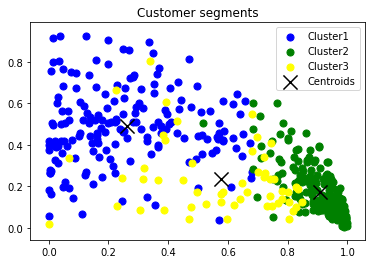

In [87]:
#Visualizamos los clusters para k=3
# ax.scatter(X[:, 0], X[:, 1], s = 50, c = features_colors, label = clusters_names)
# ax.legend(colors, cluster_names, loc="upper right")
plt.scatter(X[labels==0,0],X[labels==0,1],s=50, c='blue',label='Cluster1')
plt.scatter(X[labels==1,0],X[labels==1,1],s=50, c='green',label='Cluster2')
plt.scatter(X[labels==2,0],X[labels==2,1],s=50, c='yellow',label='Cluster3')
plt.scatter(k_means_model.cluster_centers_[:,0], k_means_model.cluster_centers_[:,1], s = 200, marker = 'x', c = 'black', alpha = 1, label = 'Centroids')

plt.title('Customer segments')
plt.legend()
plt.show()